In [1]:
# DFS using recursion
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start, end=" ")  # Process the node (e.g., print it)
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)
    return visited

# Example usage
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}
dfs(graph, 'A')


A B D E F C 

{'A', 'B', 'C', 'D', 'E', 'F'}

In [2]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)

    while queue:
        node = queue.popleft()
        print(node, end=" ")  # Process the node
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

# Example usage
bfs(graph, 'A')


A B C D E F 

In [3]:
def dfs_limited(graph, start, depth, visited=None):
    if visited is None:
        visited = set()
    if depth == 0:
        return
    visited.add(start)
    print(start, end=" ")
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs_limited(graph, neighbor, depth - 1, visited)

def idfs(graph, start, max_depth):
    for depth in range(max_depth):
        visited = set()
        dfs_limited(graph, start, depth, visited)
        print()  # New line for each depth level

# Example usage
idfs(graph, 'A', max_depth=3)



A 
A B C 


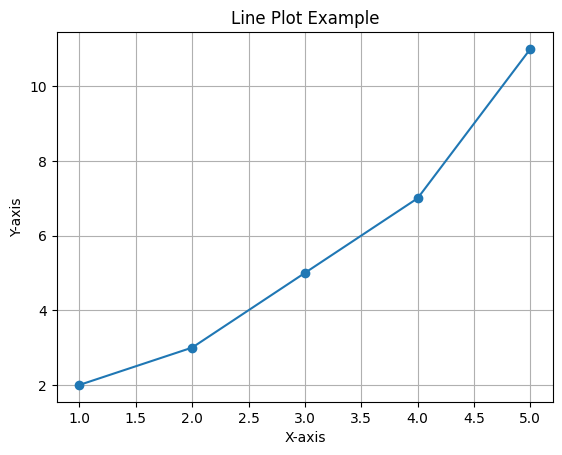

In [4]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create a line plot
plt.plot(x, y, marker='o')
plt.title('Line Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()


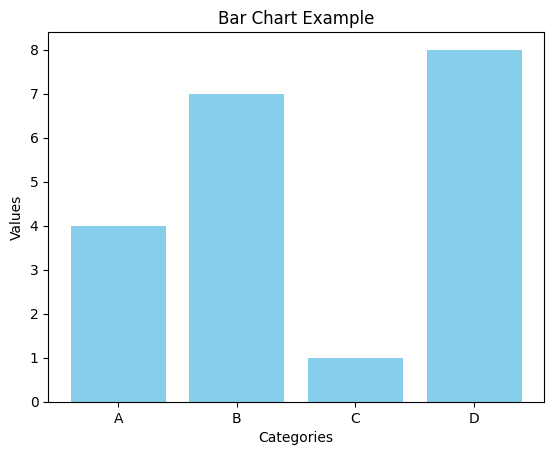

In [5]:
# Sample data
categories = ['A', 'B', 'C', 'D']
values = [4, 7, 1, 8]

# Create a bar chart
plt.bar(categories, values, color='skyblue')
plt.title('Bar Chart Example')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()


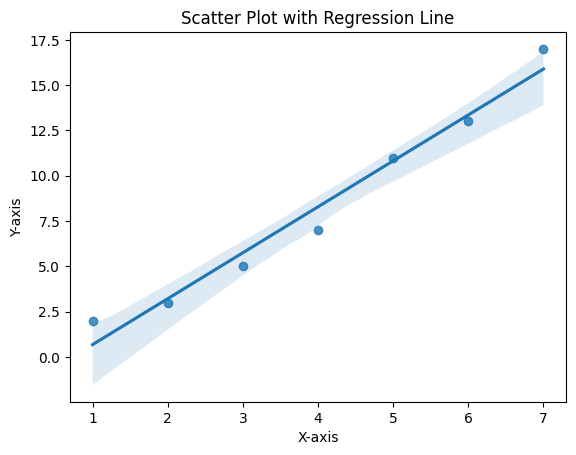

In [6]:
import seaborn as sns
import pandas as pd

# Sample data
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5, 6, 7],
    'y': [2, 3, 5, 7, 11, 13, 17]
})

# Create a scatter plot with a regression line
sns.regplot(x='x', y='y', data=data)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


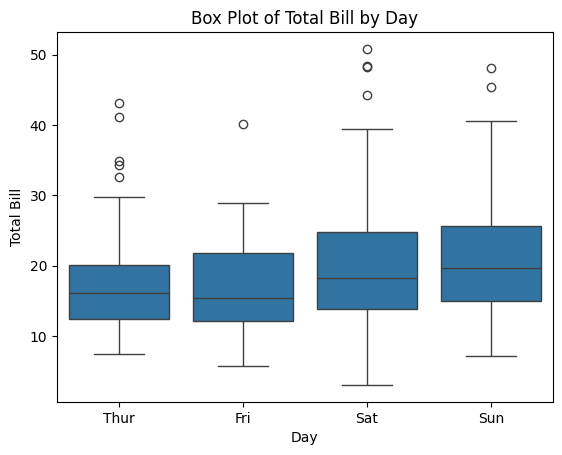

In [7]:
# Sample data
tips = sns.load_dataset('tips')

# Create a box plot
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Box Plot of Total Bill by Day')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.show()


In [8]:
import random

# List of random moments
random_moments = [
    "You find a $20 bill on the ground while walking in the park.",
    "A dog runs up to you with a stick, ready to play fetch.",
    "You unexpectedly meet an old friend at a coffee shop.",
    "You see a stunning sunset while driving home.",
    "A little kid shares their ice cream with you.",
    "You get a compliment from a stranger that brightens your day.",
    "You stumble upon a street performer who plays your favorite song.",
    "You find an interesting book in a second-hand shop.",
    "A rainbow appears after a brief rain shower.",
    "You hear laughter from a group of people having fun nearby."
]

# Function to generate a random moment
def generate_random_moment():
    return random.choice(random_moments)

# Get a random moment and print it
if __name__ == "__main__":
    moment = generate_random_moment()
    print("Random Moment:", moment)


Random Moment: You stumble upon a street performer who plays your favorite song.


In [12]:
def a_star(graph, start, goal):
    open_list = PriorityQueue()
    open_list.put((0, start))
    came_from = {}
    cost_so_far = {start: 0}

    while not open_list.empty():
        _, current = open_list.get()

        if current == goal:
            break

        for next_node, cost in graph[current]:
            new_cost = cost_so_far[current] + cost
            if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                cost_so_far[next_node] = new_cost
                priority = new_cost
                open_list.put((priority, next_node))
                came_from[next_node] = current

    return came_from, cost_so_far

# Example graph
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}

came_from, cost_so_far = a_star(graph, 'A', 'D')
print("Path:", came_from)

NameError: name 'PriorityQueue' is not defined

In [13]:
def is_safe(graph, color, node, c):
    # Check if the color c can be assigned to the node
    for neighbor in graph[node]:
        if color[neighbor] == c:  # If the neighbor has the same color
            return False
    return True

def map_coloring_util(graph, m, color, node):
    # Base case: If all nodes are assigned a color then return true
    if node == len(graph):
        return True

    # Try different colors for the node
    for c in range(1, m + 1):
        if is_safe(graph, color, node, c):
            color[node] = c  # Assign color c to node

            # Recur to assign colors to the rest of the nodes
            if map_coloring_util(graph, m, color, node + 1):
                return True

            # If assigning color c doesn't lead to a solution, remove it
            color[node] = 0

    return False  # If no color can be assigned

def map_coloring(graph, m):
    color = [0] * len(graph)  # Initialize all colors as 0 (no color assigned)

    if not map_coloring_util(graph, m, color, 0):
        print("Solution does not exist")
        return False

    # Print the solution
    print("Solution:")
    for node in range(len(graph)):
        print(f"Node {node}: Color {color[node]}")
    return True

# Example usage
if __name__ == "__main__":
    # Create a graph represented as an adjacency list
    graph = [
        [1, 2, 3],    # Node 0
        [0, 2],       # Node 1
        [0, 1, 3],    # Node 2
        [0, 2]        # Node 3
    ]

    m = 3  # Number of colors
    map_coloring(graph, m)


Solution:
Node 0: Color 1
Node 1: Color 2
Node 2: Color 3
Node 3: Color 2


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset
data = {
    'text': [
        'Free money now', 'Call me now', 'Important information regarding your account',
        'Congratulations, you have won a lottery!', 'Meeting at noon',
        'Your invoice is ready', 'You have a new message', 'Buy one get one free',
        'Reminder: your appointment', 'Please confirm your account'
    ],
    'label': ['spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham']
}

# Create DataFrame
df = pd.DataFrame(data)

# Split the dataset into features and labels
X = df['text']
y = df['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text data into numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Create a Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train_counts, y_train)

# Make predictions
y_pred = model.predict(X_test_counts)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

         ham       0.00      0.00      0.00         2
        spam       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



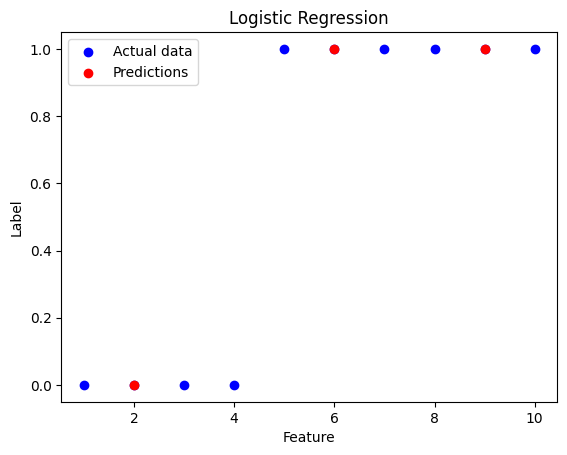

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sample dataset
data = {
    'feature': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'label': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # Binary outcome
}

# Create DataFrame
df = pd.DataFrame(data)

# Split the dataset into features and labels
X = df[['feature']]
y = df['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the results
plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X_test, y_pred, color='red', label='Predictions')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Logistic Regression')
plt.legend()
plt.show()


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



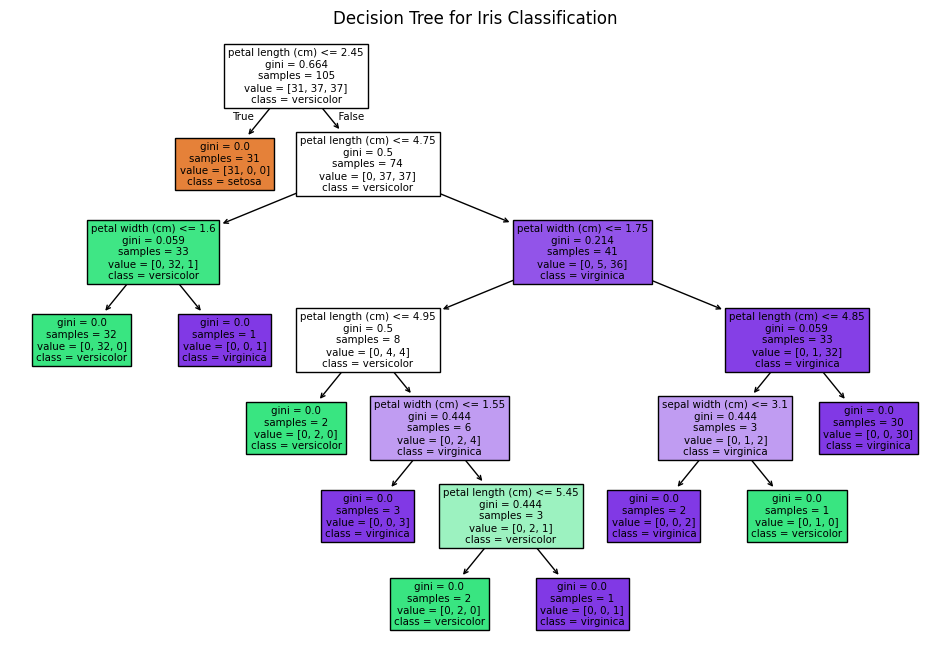

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame for easier handling
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree for Iris Classification")
plt.show()


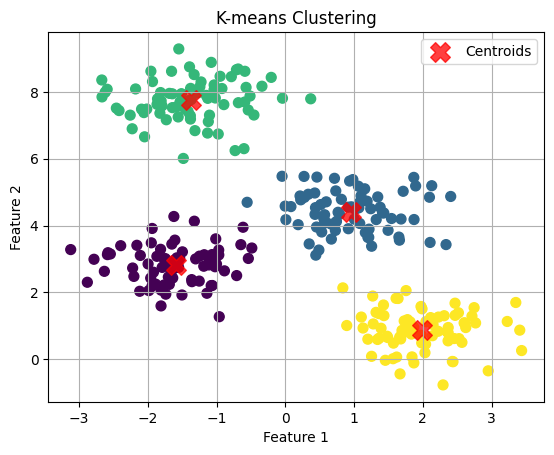

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Create K-means model
kmeans = KMeans(n_clusters=4)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster centroids and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)

                # Update weights and bias
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        return y_predicted

    def _activation_function(self, x):
        return np.where(x >= 0, 1, 0)

# Sample usage
if __name__ == "__main__":
    # Sample dataset
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1])  # AND operation

    # Create and train the Perceptron
    p = Perceptron(learning_rate=0.1, n_iter=10)
    p.fit(X, y)

    # Make predictions
    predictions = p.predict(X)
    print("Predictions:", predictions)


In [18]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)

                # Update weights and bias
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        return y_predicted

    def _activation_function(self, x):
        return np.where(x >= 0, 1, 0)

# Sample usage
if __name__ == "__main__":
    # Sample dataset
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1])  # AND operation

    # Create and train the Perceptron
    p = Perceptron(learning_rate=0.1, n_iter=10)
    p.fit(X, y)

    # Make predictions
    predictions = p.predict(X)
    print("Predictions:", predictions)


Predictions: [0 0 0 1]
